In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('../')

from sklearn.model_selection import train_test_split

In [2]:
from getdata import *

df_a= get_csvdata_ADNI()
df_o= get_csvdata(drop_young=False, drop_contradictions=False)



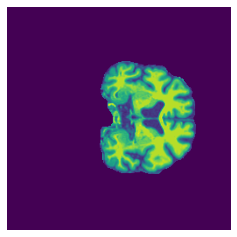

In [3]:
img_a = get_slices_ADNI(df_a["ID"][:1], N=0, dim=1, normalize=True, m=128)
from EDA.EDA_functions import *
img_mean(img_a)

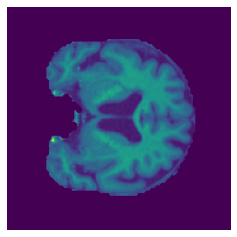

In [4]:
img_o = get_slices(df_o["ID"][:1], N=0, dim=1, normalize=True, m=128)
img_mean(img_o)